# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following given funnel in question.

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the data
pd.set_option('display.max_columns', None)
leads = pd.read_csv('C:\\Users\\Admin\\Downloads\\Machine_learning_logistic_regression\\Lead_Scoring_Case_Study\\Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:

leads= leads.replace('Select', np.nan)

In [7]:
round(leads.isnull().sum()/len(leads),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [8]:
leads.drop(['How did you hear about X Education','Lead Quality','Lead Profile','City','Asymmetrique Activity Index',
            'Asymmetrique Activity Score','Asymmetrique Profile Score','Asymmetrique Profile Index'],axis=1,inplace=True)

In [9]:
round(leads.isnull().sum()/len(leads),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [10]:
(leads['Country'].value_counts()/len(leads)).head()

India                   0.702597
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
Name: Country, dtype: float64

In [11]:
leads.drop(['Country'], axis=1, inplace=True)

In [12]:
leads['Specialization'].value_counts()/len(leads)

Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [13]:
leads['Specialization']=leads['Specialization'].replace(np.nan,'other specialization')

In [14]:
leads['What is your current occupation'].value_counts()/len(leads)

Unemployed              0.606061
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [15]:
leads['What is your current occupation']= leads['What is your current occupation'].replace(np.nan,'Unemployed')

In [16]:
leads['What matters most to you in choosing a course'].value_counts()/len(leads)

Better Career Prospects      0.706494
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [17]:
leads.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

In [18]:
leads['Tags']= leads['Tags'].replace(np.nan,'missing_tag')

In [19]:
leads['Tags'].value_counts()

missing_tag                                          3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [20]:
leads['Tags']= leads['Tags'].replace(['Lost to Others','Still Thinking','Want to take admission but has financial problems',
'In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month'
,'University not recognized','Recognition issue (DEC approval)'],'Other_tags')

In [21]:
leads.Tags.isnull().sum()

0

In [22]:
round(leads.isnull().sum()/len(leads),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [23]:
leads.dropna(inplace=True)

In [24]:
print(leads.isnull().sum())
print(leads.shape)

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                              

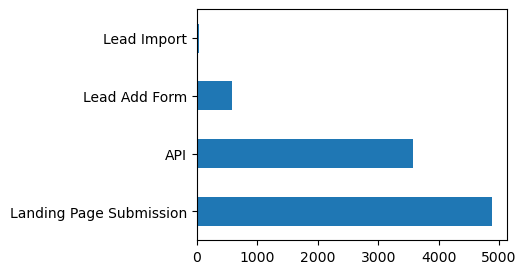

In [25]:
plt.figure(figsize=(4,3))
leads['Lead Origin'].value_counts().plot.barh()
plt.show()

In [26]:

print(leads['Lead Source'].value_counts())
leads['Lead Source']= leads['Lead Source'].replace(['Facebook','bing','Click2call','Press_Release','Social Media','Live Chat',
 'youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM','Welingak Website','Referral Sites'],'Others')
leads['Lead Source']= leads['Lead Source'].replace('google','Google')

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


In [27]:
leads['Lead Source'].value_counts()

Google            2873
Direct Traffic    2543
Olark Chat        1753
Organic Search    1154
Reference          443
Others             308
Name: Lead Source, dtype: int64

In [28]:
leads['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [29]:
leads['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [30]:
leads.drop(['Do Not Call'],axis=1, inplace=True)

In [31]:
leads['TotalVisits'].value_counts()

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [32]:
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]
    
leads['TotalVisits'].value_counts()

0.0     2161
2.0     1679
3.0     1306
4.0     1120
5.0      783
10.0     467
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
Name: TotalVisits, dtype: int64

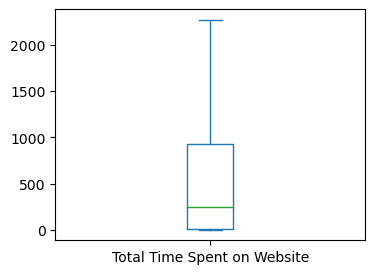

In [33]:
plt.figure(figsize=(4,3))
leads['Total Time Spent on Website'].plot.box()
plt.show()


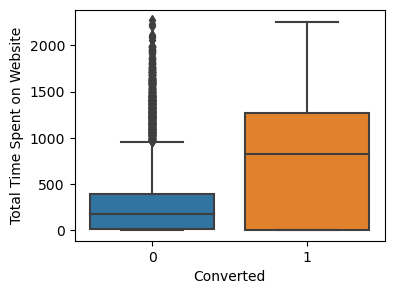

In [34]:
plt.figure(figsize=(4,3))
sns.boxplot(leads, x= 'Converted',y='Total Time Spent on Website')
plt.show()

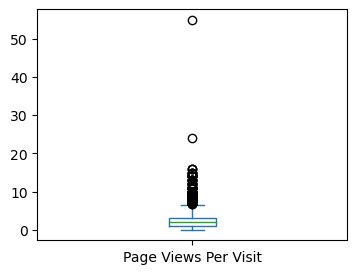

In [35]:
plt.figure(figsize=(4,3))
leads['Page Views Per Visit'].plot.box()
plt.show()

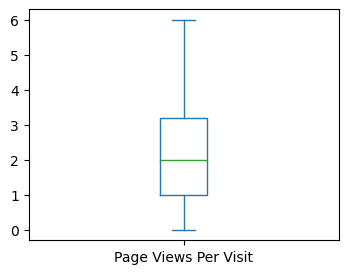

In [36]:
plt.figure(figsize=(4,3))
percentile = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentile[0]] = percentile[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentile[1]] = percentile[1]
    
leads['Page Views Per Visit'].plot.box()
plt.show()

In [37]:
print(leads['Last Activity'].value_counts(normalize=True))
leads['Last Activity']=leads['Last Activity'].replace(['Email Link Clicked','Form Submitted on Website','Unreachable',
'Unsubscribed','Had a Phone Conversation','View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam',
'Visited Booth in Tradeshow','Resubscribed to emails'],'Other_activity')

Email Opened                    0.378223
SMS Sent                        0.299317
Olark Chat Conversation         0.107119
Page Visited on Website         0.070531
Converted to Lead               0.047168
Email Bounced                   0.034384
Email Link Clicked              0.029425
Form Submitted on Website       0.012784
Unreachable                     0.009918
Unsubscribed                    0.006502
Had a Phone Conversation        0.002755
View in browser link Clicked    0.000661
Approached upfront              0.000551
Email Received                  0.000220
Email Marked Spam               0.000220
Visited Booth in Tradeshow      0.000110
Resubscribed to emails          0.000110
Name: Last Activity, dtype: float64


In [38]:
leads['Specialization'].value_counts()

other specialization                 3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [39]:
leads['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [40]:
leads['What is your current occupation']=leads['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Unemployed')

In [41]:
leads['Search'].value_counts()


No     9060
Yes      14
Name: Search, dtype: int64

In [42]:
leads['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [43]:
leads['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [44]:
leads['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [45]:
leads['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [46]:
leads['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [47]:
leads['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [48]:
leads['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [49]:
leads['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [50]:
leads['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [51]:
print(leads['I agree to pay the amount through cheque'].value_counts())

No    9074
Name: I agree to pay the amount through cheque, dtype: int64


In [52]:
leads['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [53]:
leads['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [54]:
leads['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Received'
,'Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website'],
    'other_activity',inplace=True)

In [55]:
leads.drop(['Search','Magazine','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement',
'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content',
'I agree to pay the amount through cheque','Prospect ID'],axis=1,inplace=True)

In [56]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [57]:
vars= ['Do Not Email','A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads[vars] = leads[vars].apply(binary_map)

In [58]:
leads= pd.get_dummies(data=leads,columns=['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation'
        ,'A free copy of Mastering The Interview','Last Notable Activity','Tags'],drop_first=True)


In [59]:
leads.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_other specialization,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_1,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_activity,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_missing_tag,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,660737,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [60]:
from sklearn.model_selection import train_test_split

X = leads.drop(['Lead Number','Converted'],axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_other specialization,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_1,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_activity,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_missing_tag,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [61]:
y= leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [63]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

num_vars= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[num_vars]= scaler.fit_transform(X_train[num_vars])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_other specialization,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_1,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_activity,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_missing_tag,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
3009,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7987,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [64]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [65]:
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [66]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 38),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 41),
 ('Lead Source_Others', False, 6),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Bounced', False, 33),
 ('Last Activity_Email Opened', False, 24),
 ('Last Activity_Olark Chat Conversation', False, 3),
 ('Last Activity_Other_activity', False, 28),
 ('Last Activity_Page Visited on Website', False, 31),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 35),
 ('Specialization_E-Business', False, 37),
 ('Specialization_E-COMMERCE', False, 18),
 ('Specialization_Finance Management', False, 26),
 ('Specialization_Healthcare Management', False, 36),
 ('Specia

In [67]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other_activity', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Other_tags',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_missing_tag', 'Tags_number not provided',
       'Tags_switched off', 'Tags_wrong number given'],
      dtype='object')

In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1153.4
Date:                Tue, 16 Jan 2024   Deviance:                       2306.7
Time:                        19:58:20   Pearson chi2:                 9.74e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6209
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.0738      0.235    -17.342      0.000      -4.534      -3.613
Do Not Email                                -1.2166      0.295     -4.124      0.000      -1.795      -0.638
Total Time Spent on Website                  1.0280      0.058     17.676      0.000       0.914       1.142
Lead Origin_Landing Page Submission         -1.1768      0.124     -9.464      0.000      -1.421      -0.933
Lead Origin_Lead Add Form                    4.1490      0.547      7.582      0.000       3.077       5.221
Lead Source_Reference                       -3.4132      0.703     -4.852      0.000      -4.792      -2.035
Last Activity_SMS Sent                       1.1937      0.225      5.300      0.000       0.752       1.635
Last Notable Activity_Email Opened           1.3889      0.145      9.556      0.000       1.104       1.674
Last Notable Activity_SMS Sent               2.5401      0.227     11.199      0.000       2.096       2.985
Last Notable Activity_other_activity         1.9454      0.448      4.338      0.000       1.066       2.824
Tags_Busy                                    2.5014      0.326      7.678      0.000       1.863       3.140
Tags_Closed by Horizzon                      8.7969      0.764     11.515      0.000       7.300      10.294
Tags_Lost to EINS                            8.1774      0.760     10.758      0.000       6.688       9.667
Tags_Other_tags                              1.6339      0.596      2.740      0.006       0.465       2.803
Tags_Ringing                                -1.8551      0.337     -5.511      0.000      -2.515      -1.195
Tags_Will revert after reading the email     6.7917      0.290     23.456      0.000       6.224       7.359
Tags_invalid number                        -22.7124   2.48e+04     -0.001      0.999   -4.87e+04    4.86e+04
Tags_missing_tag                             1.9679      0.225      8.761      0.000       1.528       2.408
Tags_number not provided                   -23.3126   4.11e+04     -0.001      1.000   -8.05e+04    8.05e+04
Tags_switched off                           -1.7433      0.584     -2.983      0.003      -2.889      -0.598
Tags_wrong number given                    -23.2349   3.23e+04     -0.001      0.999   -6.34e+04    6.34e+04
============================================================================================================
"""

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_SMS Sent,5.77
7,Last Notable Activity_SMS Sent,5.12
3,Lead Origin_Lead Add Form,4.37
4,Lead Source_Reference,4.24
2,Lead Origin_Landing Page Submission,2.30
14,Tags_Will revert after reading the email,2.24
6,Last Notable Activity_Email Opened,1.93
16,Tags_missing_tag,1.78
13,Tags_Ringing,1.56
0,Do Not Email,1.27


In [70]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.113192
1012    0.042737
9226    0.003510
4750    0.894770
7987    0.997964
1281    0.998010
2880    0.057337
4971    0.983993
7536    0.996818
1248    0.017951
dtype: float64

In [71]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID
3009,0,0.113192,3009
1012,0,0.042737,1012
9226,0,0.003510,9226
4750,1,0.894770,4750
7987,1,0.997964,7987


In [72]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted
3009,0,0.113192,3009,0
1012,0,0.042737,1012,0
9226,0,0.003510,9226,0
4750,1,0.894770,4750,1
7987,1,0.997964,7987,1


In [73]:
from sklearn import metrics

In [74]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[3754  151]
 [ 265 2181]]


In [75]:
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.9344985041725713


In [76]:
col = col.drop('Tags_number not provided', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other_activity', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Other_tags',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_missing_tag', 'Tags_switched off',
       'Tags_wrong number given'],
      dtype='object')

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1155.2
Date:                Tue, 16 Jan 2024   Deviance:                       2310.5
Time:                        19:58:32   Pearson chi2:                 9.74e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6206
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.1301      0.236    -17.479      0.000      -4.593      -3.667
Do Not Email                                -1.2206      0.294     -4.150      0.000      -1.797      -0.644
Total Time Spent on Website                  1.0259      0.058     17.662      0.000       0.912       1.140
Lead Origin_Landing Page Submission         -1.1836      0.124     -9.520      0.000      -1.427      -0.940
Lead Origin_Lead Add Form                    4.1431      0.547      7.574      0.000       3.071       5.215
Lead Source_Reference                       -3.4097      0.703     -4.847      0.000      -4.788      -2.031
Last Activity_SMS Sent                       1.1934      0.225      5.296      0.000       0.752       1.635
Last Notable Activity_Email Opened           1.3874      0.145      9.544      0.000       1.102       1.672
Last Notable Activity_SMS Sent               2.5241      0.226     11.144      0.000       2.080       2.968
Last Notable Activity_other_activity         1.9407      0.448      4.332      0.000       1.063       2.819
Tags_Busy                                    2.5728      0.325      7.911      0.000       1.935       3.210
Tags_Closed by Horizzon                      8.8579      0.764     11.590      0.000       7.360      10.356
Tags_Lost to EINS                            8.2393      0.760     10.836      0.000       6.749       9.730
Tags_Other_tags                              1.7000      0.596      2.853      0.004       0.532       2.868
Tags_Ringing                                -1.7792      0.336     -5.300      0.000      -2.437      -1.121
Tags_Will revert after reading the email     6.8549      0.290     23.633      0.000       6.286       7.423
Tags_invalid number                        -21.6380   1.51e+04     -0.001      0.999   -2.95e+04    2.95e+04
Tags_missing_tag                             2.0319      0.225      9.028      0.000       1.591       2.473
Tags_switched off                           -1.6674      0.584     -2.856      0.004      -2.812      -0.523
Tags_wrong number given                    -22.1600   1.96e+04     -0.001      0.999   -3.85e+04    3.84e+04
============================================================================================================
"""

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_SMS Sent,5.77
7,Last Notable Activity_SMS Sent,5.11
3,Lead Origin_Lead Add Form,4.37
4,Lead Source_Reference,4.24
2,Lead Origin_Landing Page Submission,2.29
14,Tags_Will revert after reading the email,2.23
6,Last Notable Activity_Email Opened,1.92
16,Tags_missing_tag,1.77
13,Tags_Ringing,1.55
0,Do Not Email,1.27


In [79]:
col = col.drop('Tags_invalid number', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other_activity', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Other_tags',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_missing_tag', 'Tags_switched off', 'Tags_wrong number given'],
      dtype='object')

In [80]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1158.5
Date:                Tue, 16 Jan 2024   Deviance:                       2317.0
Time:                        19:58:33   Pearson chi2:                 9.77e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6202
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.2547      0.237    -17.971      0.000      -4.719      -3.791
Do Not Email                                -1.2158      0.294     -4.141      0.000      -1.791      -0.640
Total Time Spent on Website                  1.0328      0.058     17.788      0.000       0.919       1.147
Lead Origin_Landing Page Submission         -1.1940      0.124     -9.612      0.000      -1.438      -0.951
Lead Origin_Lead Add Form                    4.1420      0.547      7.575      0.000       3.070       5.214
Lead Source_Reference                       -3.3998      0.704     -4.831      0.000      -4.779      -2.021
Last Activity_SMS Sent                       1.1881      0.226      5.262      0.000       0.746       1.631
Last Notable Activity_Email Opened           1.3854      0.146      9.512      0.000       1.100       1.671
Last Notable Activity_SMS Sent               2.4968      0.226     11.041      0.000       2.054       2.940
Last Notable Activity_other_activity         1.9265      0.448      4.303      0.000       1.049       2.804
Tags_Busy                                    2.7222      0.322      8.450      0.000       2.091       3.354
Tags_Closed by Horizzon                      8.9884      0.764     11.761      0.000       7.491      10.486
Tags_Lost to EINS                            8.3724      0.760     11.011      0.000       6.882       9.863
Tags_Other_tags                              1.8336      0.595      3.083      0.002       0.668       2.999
Tags_Ringing                                -1.6266      0.332     -4.896      0.000      -2.278      -0.975
Tags_Will revert after reading the email     6.9905      0.289     24.167      0.000       6.424       7.557
Tags_missing_tag                             2.1692      0.223      9.716      0.000       1.732       2.607
Tags_switched off                           -1.5116      0.582     -2.599      0.009      -2.652      -0.371
Tags_wrong number given                    -21.0132   1.19e+04     -0.002      0.999   -2.34e+04    2.33e+04
============================================================================================================
"""

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_SMS Sent,5.76
7,Last Notable Activity_SMS Sent,5.11
3,Lead Origin_Lead Add Form,4.37
4,Lead Source_Reference,4.24
2,Lead Origin_Landing Page Submission,2.27
14,Tags_Will revert after reading the email,2.20
6,Last Notable Activity_Email Opened,1.91
15,Tags_missing_tag,1.74
13,Tags_Ringing,1.53
0,Do Not Email,1.26


In [82]:
col = col.drop('Tags_wrong number given', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other_activity', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Other_tags',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_missing_tag', 'Tags_switched off'],
      dtype='object')

In [83]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1161.2
Date:                Tue, 16 Jan 2024   Deviance:                       2322.5
Time:                        19:58:35   Pearson chi2:                 9.80e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6199
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.3458      0.238    -18.233      0.000      -4.813      -3.879
Do Not Email                                -1.2175      0.293     -4.160      0.000      -1.791      -0.644
Total Time Spent on Website                  1.0299      0.058     17.766      0.000       0.916       1.144
Lead Origin_Landing Page Submission         -1.1980      0.124     -9.654      0.000      -1.441      -0.955
Lead Origin_Lead Add Form                    4.1360      0.547      7.568      0.000       3.065       5.207
Lead Source_Reference                       -3.3938      0.704     -4.823      0.000      -4.773      -2.015
Last Activity_SMS Sent                       1.1845      0.226      5.245      0.000       0.742       1.627
Last Notable Activity_Email Opened           1.3798      0.146      9.473      0.000       1.094       1.665
Last Notable Activity_SMS Sent               2.4790      0.226     10.983      0.000       2.037       2.921
Last Notable Activity_other_activity         1.9252      0.448      4.299      0.000       1.047       2.803
Tags_Busy                                    2.8301      0.321      8.810      0.000       2.200       3.460
Tags_Closed by Horizzon                      9.0821      0.765     11.878      0.000       7.584      10.581
Tags_Lost to EINS                            8.4677      0.761     11.132      0.000       6.977       9.959
Tags_Other_tags                              1.9361      0.594      3.260      0.001       0.772       3.100
Tags_Ringing                                -1.5125      0.331     -4.574      0.000      -2.161      -0.864
Tags_Will revert after reading the email     7.0880      0.290     24.450      0.000       6.520       7.656
Tags_missing_tag                             2.2700      0.223     10.157      0.000       1.832       2.708
Tags_switched off                           -1.3974      0.581     -2.406      0.016      -2.536      -0.259
============================================================================================================
"""

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_SMS Sent,5.75
7,Last Notable Activity_SMS Sent,5.11
3,Lead Origin_Lead Add Form,4.37
4,Lead Source_Reference,4.24
2,Lead Origin_Landing Page Submission,2.26
14,Tags_Will revert after reading the email,2.19
6,Last Notable Activity_Email Opened,1.90
15,Tags_missing_tag,1.73
13,Tags_Ringing,1.52
0,Do Not Email,1.26


In [85]:
col = col.drop('Last Activity_SMS Sent', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other_activity', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Other_tags',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_missing_tag', 'Tags_switched off'],
      dtype='object')

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1174.3
Date:                Tue, 16 Jan 2024   Deviance:                       2348.7
Time:                        19:58:36   Pearson chi2:                 9.41e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6183
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.1624      0.232    -17.978      0.000      -4.616      -3.709
Do Not Email                                -1.1711      0.286     -4.091      0.000      -1.732      -0.610
Total Time Spent on Website                  1.0424      0.058     18.040      0.000       0.929       1.156
Lead Origin_Landing Page Submission         -1.1493      0.124     -9.301      0.000      -1.391      -0.907
Lead Origin_Lead Add Form                    4.3446      0.556      7.816      0.000       3.255       5.434
Lead Source_Reference                       -3.4312      0.705     -4.868      0.000      -4.813      -2.050
Last Notable Activity_Email Opened           1.1230      0.133      8.472      0.000       0.863       1.383
Last Notable Activity_SMS Sent               3.3913      0.156     21.741      0.000       3.086       3.697
Last Notable Activity_other_activity         1.6374      0.441      3.711      0.000       0.773       2.502
Tags_Busy                                    2.9291      0.321      9.126      0.000       2.300       3.558
Tags_Closed by Horizzon                      8.9200      0.761     11.726      0.000       7.429      10.411
Tags_Lost to EINS                            8.4738      0.758     11.174      0.000       6.987       9.960
Tags_Other_tags                              2.1213      0.604      3.512      0.000       0.937       3.305
Tags_Ringing                                -1.4718      0.330     -4.454      0.000      -2.119      -0.824
Tags_Will revert after reading the email     7.0978      0.288     24.666      0.000       6.534       7.662
Tags_missing_tag                             2.3222      0.222     10.441      0.000       1.886       2.758
Tags_switched off                           -1.3364      0.580     -2.303      0.021      -2.474      -0.199
============================================================================================================
"""

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,4.36
4,Lead Source_Reference,4.24
2,Lead Origin_Landing Page Submission,2.22
13,Tags_Will revert after reading the email,2.12
6,Last Notable Activity_SMS Sent,1.98
5,Last Notable Activity_Email Opened,1.78
14,Tags_missing_tag,1.63
12,Tags_Ringing,1.49
0,Do Not Email,1.26
1,Total Time Spent on Website,1.24


In [88]:
col = col.drop('Tags_switched off', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other_activity', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Other_tags',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_missing_tag'],
      dtype='object')

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1177.6
Date:                Tue, 16 Jan 2024   Deviance:                       2355.3
Time:                        19:58:38   Pearson chi2:                 8.70e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6179
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4103      0.225    -19.626      0.000      -4.851      -3.970
Do Not Email                                -1.1793      0.284     -4.146      0.000      -1.737      -0.622
Total Time Spent on Website                  1.0440      0.058     18.065      0.000       0.931       1.157
Lead Origin_Landing Page Submission         -1.1489      0.123     -9.327      0.000      -1.390      -0.907
Lead Origin_Lead Add Form                    4.3404      0.555      7.815      0.000       3.252       5.429
Lead Source_Reference                       -3.4120      0.705     -4.840      0.000      -4.794      -2.030
Last Notable Activity_Email Opened           1.1207      0.133      8.436      0.000       0.860       1.381
Last Notable Activity_SMS Sent               3.3319      0.153     21.716      0.000       3.031       3.633
Last Notable Activity_other_activity         1.6385      0.442      3.709      0.000       0.773       2.504
Tags_Busy                                    3.2079      0.310     10.352      0.000       2.601       3.815
Tags_Closed by Horizzon                      9.1653      0.759     12.079      0.000       7.678      10.652
Tags_Lost to EINS                            8.7214      0.756     11.532      0.000       7.239      10.204
Tags_Other_tags                              2.3834      0.598      3.987      0.000       1.212       3.555
Tags_Ringing                                -1.1769      0.317     -3.710      0.000      -1.799      -0.555
Tags_Will revert after reading the email     7.3500      0.281     26.134      0.000       6.799       7.901
Tags_missing_tag                             2.5851      0.211     12.226      0.000       2.171       2.999
============================================================================================================
"""

In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,4.36
4,Lead Source_Reference,4.24
2,Lead Origin_Landing Page Submission,2.15
13,Tags_Will revert after reading the email,2.05
6,Last Notable Activity_SMS Sent,1.91
5,Last Notable Activity_Email Opened,1.74
14,Tags_missing_tag,1.57
12,Tags_Ringing,1.45
0,Do Not Email,1.26
1,Total Time Spent on Website,1.24


In [91]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [92]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [93]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted
3009,0,0.117049,3009,0
1012,0,0.043993,1012,0
9226,0,0.001479,9226,0
4750,1,0.888291,4750,1
7987,1,0.994875,7987,1


In [94]:
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.9344985041725713


In [95]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Reference',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other_activity', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Other_tags',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_missing_tag'],
      dtype='object')

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1245.0
Date:                Tue, 16 Jan 2024   Deviance:                       2490.1
Time:                        19:59:16   Pearson chi2:                 9.03e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6098
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.3765      0.223    -19.608      0.000      -4.814      -3.939
Do Not Email                                -0.9410      0.264     -3.560      0.000      -1.459      -0.423
Total Time Spent on Website                  0.9737      0.057     17.122      0.000       0.862       1.085
Lead Origin_Landing Page Submission         -1.3205      0.122    -10.864      0.000      -1.559      -1.082
Lead Source_Reference                        0.6383      0.450      1.417      0.156      -0.244       1.521
Last Notable Activity_Email Opened           1.1906      0.129      9.263      0.000       0.939       1.443
Last Notable Activity_SMS Sent               3.4582      0.149     23.204      0.000       3.166       3.750
Last Notable Activity_other_activity         1.5743      0.426      3.696      0.000       0.739       2.409
Tags_Busy                                    3.2402      0.311     10.417      0.000       2.631       3.850
Tags_Closed by Horizzon                      9.3526      0.757     12.362      0.000       7.870      10.835
Tags_Lost to EINS                            8.8525      0.755     11.720      0.000       7.372      10.333
Tags_Other_tags                              2.6469      0.593      4.466      0.000       1.485       3.809
Tags_Ringing                                -1.1665      0.316     -3.690      0.000      -1.786      -0.547
Tags_Will revert after reading the email     7.4197      0.282     26.319      0.000       6.867       7.972
Tags_missing_tag                             2.7070      0.211     12.829      0.000       2.293       3.121
============================================================================================================
"""

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.11
12,Tags_Will revert after reading the email,2.05
5,Last Notable Activity_SMS Sent,1.87
4,Last Notable Activity_Email Opened,1.74
13,Tags_missing_tag,1.55
11,Tags_Ringing,1.45
3,Lead Source_Reference,1.42
0,Do Not Email,1.26
1,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.18


In [98]:
col = col.drop('Lead Source_Reference', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other_activity', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Other_tags',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_missing_tag'],
      dtype='object')

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1246.1
Date:                Tue, 16 Jan 2024   Deviance:                       2492.2
Time:                        20:00:56   Pearson chi2:                 8.94e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6096
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.3699      0.223    -19.579      0.000      -4.807      -3.932
Do Not Email                                -0.9217      0.263     -3.502      0.000      -1.438      -0.406
Total Time Spent on Website                  0.9686      0.057     17.031      0.000       0.857       1.080
Lead Origin_Landing Page Submission         -1.3469      0.120    -11.180      0.000      -1.583      -1.111
Last Notable Activity_Email Opened           1.1994      0.128      9.342      0.000       0.948       1.451
Last Notable Activity_SMS Sent               3.4720      0.149     23.333      0.000       3.180       3.764
Last Notable Activity_other_activity         1.5621      0.427      3.662      0.000       0.726       2.398
Tags_Busy                                    3.2462      0.311     10.428      0.000       2.636       3.856
Tags_Closed by Horizzon                      9.5468      0.747     12.772      0.000       8.082      11.012
Tags_Lost to EINS                            8.9087      0.754     11.811      0.000       7.430      10.387
Tags_Other_tags                              2.7635      0.579      4.771      0.000       1.628       3.899
Tags_Ringing                                -1.1409      0.316     -3.615      0.000      -1.759      -0.522
Tags_Will revert after reading the email     7.4915      0.279     26.876      0.000       6.945       8.038
Tags_missing_tag                             2.7043      0.211     12.809      0.000       2.291       3.118
============================================================================================================
"""

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.02
4,Last Notable Activity_SMS Sent,1.85
11,Tags_Will revert after reading the email,1.85
3,Last Notable Activity_Email Opened,1.73
12,Tags_missing_tag,1.55
10,Tags_Ringing,1.44
0,Do Not Email,1.25
1,Total Time Spent on Website,1.15
5,Last Notable Activity_other_activity,1.14
6,Tags_Busy,1.08


In [101]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [102]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [103]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted
3009,0,0.122569,3009,0
1012,0,0.052390,1012,0
9226,0,0.001706,9226,0
4750,1,0.886066,4750,1
7987,1,0.994212,7987,1


In [104]:
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.9300897496457251


In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8916598528209322

In [107]:
# Let us calculate specificity
TN / float(TN+FP)

0.9613316261203585

In [108]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

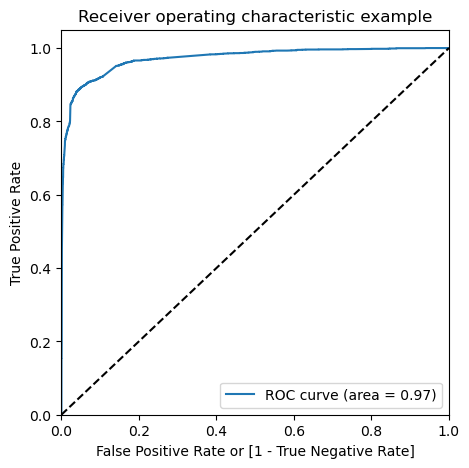

In [110]:
draw_roc(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

In [111]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.122569,3009,0,1,1,0,0,0,0,0,0,0,0
1012,0,0.052390,1012,0,1,0,0,0,0,0,0,0,0,0
9226,0,0.001706,9226,0,1,0,0,0,0,0,0,0,0,0
4750,1,0.886066,4750,1,1,1,1,1,1,1,1,1,1,0
7987,1,0.994212,7987,1,1,1,1,1,1,1,1,1,1,1


In [112]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.853881  0.967702  0.782586
0.2   0.2  0.893245  0.951349  0.856850
0.3   0.3  0.917651  0.909648  0.922663
0.4   0.4  0.925996  0.896566  0.944430
0.5   0.5  0.930090  0.880621  0.961076
0.6   0.6  0.928673  0.862224  0.970294
0.7   0.7  0.926626  0.848324  0.975672
0.8   0.8  0.903480  0.773508  0.984891
0.9   0.9  0.890568  0.730172  0.991037


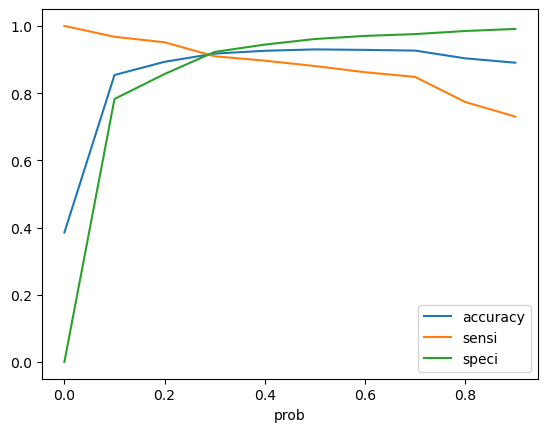

In [113]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [121]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.122569,3009,0,1,1,0,0,0,0,0,0,0,0,0
1012,0,0.052390,1012,0,1,0,0,0,0,0,0,0,0,0,0
9226,0,0.001706,9226,0,1,0,0,0,0,0,0,0,0,0,0
4750,1,0.886066,4750,1,1,1,1,1,1,1,1,1,1,0,1
7987,1,0.994212,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [122]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)*100

92.45788064871674

In [123]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.final_predicted )
confusion2

array([[3675,  230],
       [ 249, 2197]], dtype=int64)

In [124]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Let's see the sensitivity also known as Recall
TP / float(TP+FN)*100

89.82011447260834

In [126]:
# Let us calculate specificity
TN / float(TN+FP)*100

94.1101152368758

In [127]:
# precision
TP/ float(TP+FP)*100

90.52327976926247

In [128]:
from sklearn.metrics import precision_recall_curve

In [129]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

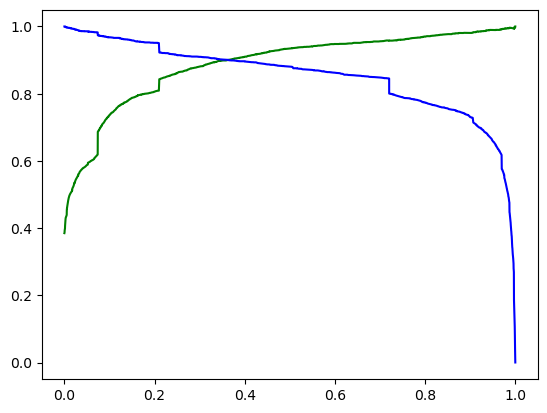

In [130]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "b-")
plt.show()

In [131]:
num_vars= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[num_vars]= scaler.transform(X_test[num_vars])

In [132]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Last Notable Activity_Email Opened,Last Notable Activity_SMS Sent,Last Notable Activity_other_activity,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_missing_tag
3271,0,-0.600595,0,1,0,0,0,0,0,0,0,0,1
1490,0,1.887326,1,1,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,1,0,0,0,0,0,0,0,0,1
4216,0,-0.888650,0,0,0,0,0,1,0,0,0,0,0
3830,0,-0.587751,1,1,0,0,0,0,0,0,0,0,1


In [133]:
X_test_sm = sm.add_constant(X_test)

In [134]:
y_test_pred = res.predict(X_test_sm)

In [135]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.259617
1490,0.991855
7936,0.232284
4216,0.986825
3830,0.084525


In [136]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

y_test_df['LeadID'] = y_test_df.index


In [137]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_test_df.head()

,Converted,LeadID
0,0,3271
1,1,1490
2,0,7936
3,1,4216
4,0,3830


In [138]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final = y_pred_final.reindex(columns=['LeadID','Converted','Conversion_Prob'])
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,3271,0,0.259617
1,1490,1,0.991855
2,7936,0,0.232284
3,4216,1,0.986825
4,3830,0,0.084525


In [139]:
y_pred_final['predicted_conversion'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,predicted_conversion
0,3271,0,0.259617,0
1,1490,1,0.991855,1
2,7936,0,0.232284,0
3,4216,1,0.986825,1
4,3830,0,0.084525,0


In [1]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted_conversion)*100

NameError: name 'metrics' is not defined

In [141]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted_conversion )
confusion2

array([[1620,  114],
       [ 110,  879]], dtype=int64)

In [142]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [143]:
# Let's see the sensitivity
TP / float(TP+FN)

0.8887765419615774

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.9342560553633218

In [145]:
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map(lambda x:round(x*100))
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,predicted_conversion,Lead_Score
0,3271,0,0.259617,0,26
1,1490,1,0.991855,1,99
2,7936,0,0.232284,0,23
3,4216,1,0.986825,1,99
4,3830,0,0.084525,0,8
